## Install

In [58]:
%pip install nltk
%pip install seaborn
%pip install pandas
%pip install nltk
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Imports

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from nltk import ngrams

## Config

In [23]:
data_dir = "./data"
train_path = f"{data_dir}/train.csv"
test_path = f"{data_dir}/test.csv"

## Load train dataset

In [24]:
train_df = pd.read_csv(train_path)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Dataset statistics

In [25]:
train_df.shape

(7613, 5)

In [26]:
train_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [28]:
col_id = 'id'
col_keyword = 'keyword'
col_location = 'location'
col_text = 'text'
col_target = 'target'

In [29]:
train_df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [30]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [31]:
train_df.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


### Sample keyword column

In [32]:
train_df[col_keyword].sample(n=10)

2910           drown
3127    electrocuted
6197           smoke
4517       hurricane
463           attack
7504           wreck
5316        outbreak
833         blizzard
559           battle
6120         sinking
Name: keyword, dtype: object

### Sample location column

In [33]:
train_df[col_keyword].sample(n=10)

956                body%20bag
6203                    smoke
1012           body%20bagging
166       airplane%20accident
5665                   rescue
1246    buildings%20on%20fire
2083                     dead
1720                 collided
2647                 detonate
4430                  hostage
Name: keyword, dtype: object

## EDA

<AxesSubplot:>

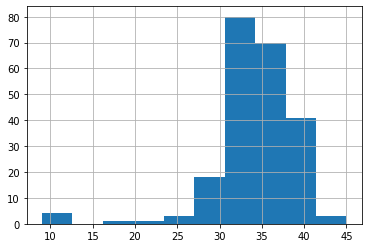

NameError: name 'data2' is not defined

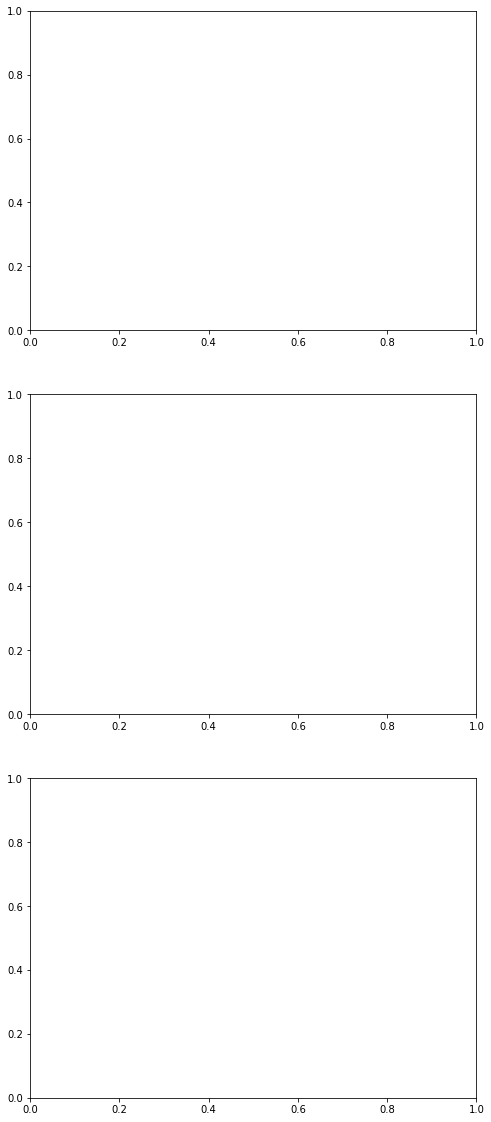

In [35]:
train_df[col_keyword]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

## Data cleaning

In [111]:
def text_preproc(df: pd.DataFrame):
    temp_df = temp_df.str.lower()
    temp_df = temp_df.str.replace("\n", " ")
    temp_df = temp_df.str.replace('%20', ' ')
    temp_df = temp_df.str.replace(',', ' ')
    temp_df = temp_df.str.replace('-', ' ')
    temp_df = temp_df.str.replace('\s+', ' ', regex=True)
    temp_df = df.str.strip()
    return temp_df

train_df[col_keyword] = text_col_cleaning(train_df[col_keyword])
train_df[col_location] = text_col_cleaning(train_df[col_location])
train_df[col_text] = text_col_cleaning(train_df[col_text])

In [112]:
train_df[col_keyword].sample(n=10)

6395         suicide bomb
1522         catastrophic
1916               curfew
6418       suicide bomber
2456           derailment
1256    buildings on fire
5452               police
4745            lightning
5008             military
5819               rubble
Name: keyword, dtype: object

In [113]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,13000 people receive #wildfires evacuation ord...,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [114]:
train_df.nunique()

id          7613
keyword      221
location    3083
text        7500
target         2
dtype: int64

In [ ]:
print("Decreased number of unique values in location column for about ~ 200")

## FEATURE ENGINEERING

In [ ]:
def search_url(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)      
    result = [x[0] for x in url]
    return len(result) > 0

In [60]:
train_df['location_totalwords'] = train_df[col_location].str.split().str.len().replace(np.nan, 0)
train_df['text_totalwords'] = train_df[col_text].str.split().str.len().replace(np.nan, 0)
train_df['contains_url'] = train_df[col_text].apply(search_url)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7608    0.0
7609    0.0
7610    0.0
7611    0.0
7612    0.0
Name: location_totalwords, Length: 7613, dtype: float64
0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text_totalwords, Length: 7613, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
7608     True
7609    False
7610     True
7611    False
7612     True
Name: contains_url, Length: 7613, dtype: bool
